## Problem Statement
 A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Loading the Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100

## Loading the Data

In [3]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
## Chech the train data shape
df_train.shape


(550068, 12)

* Train Dataframe contain 550068 columnsand 12 features

In [5]:
##import test data set
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
## Chech the train data shape
df_test.shape

(233599, 11)

* Train Dataframe contain 233599 columnsand 12 features

In [7]:
print('Train Data Set:',df_train.shape)
print('Test Data Set:',df_test.shape)


Train Data Set: (550068, 12)
Test Data Set: (233599, 11)


## Combine the both Train and Test Data

In [8]:
df=df_train.append(df_test)

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Read and undeerstand the data

In [10]:
df.shape

(783667, 12)

In [11]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [13]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

*  Product_Category_2,Product_Category_3 have the missing value and Purchase  also have null values but it is in test data

In [14]:
## checking the stastical summary
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


1. **Occupation** and  **Marital_Status** has a min value of zero. 
2. The ‘count’ of Product_Category_2 and Product_Category_3 confirms the presence  of missing value check.

In [15]:
df.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


* By the categorical summary we see that count of each varibale ,unique values ,frequency of the variable

In [16]:
#categorical variable
df_cat=df.select_dtypes(include='O')
df_cat.columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [17]:
## print the frequency of the each  categorical variable
for col in df_cat:
    print('The frequency of categorical variable:',col)
    print(df[col].value_counts())
    print(" ")

The frequency of categorical variable: Product_ID
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64
 
The frequency of categorical variable: Gender
M    590031
F    193636
Name: Gender, dtype: int64
 
The frequency of categorical variable: Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
 
The frequency of categorical variable: City_Category
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
 
The frequency of categorical variable: Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64
 


# Missing Value Treatment

In [18]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

 #### we see that Product_Category_2,Product_Category_3  and Purchase  have missing value 

In [19]:
# Drop the user_id and  column Becoz it is unique id  so we can drop it and it is not use for analysis
#df.drop(['User_ID'], axis=1 ,inplace=True)

In [20]:
# Drop the product_id and  column Becoz it is unique id  so we can drop it
#df.drop(['Product_ID'], axis=1 ,inplace=True)

In [21]:
df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [19]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

#### It is dicrete continueous valriable there is more repeted values in the data so  for repeted value we usw to replace mode 

In [20]:
from scipy.stats import mode
p2_mode=df.pivot_table(values='Product_Category_2',index=['User_ID'],aggfunc=lambda x:mode(x).mode[0])
p2_mode

,Product_Category_2
User_ID,
1000001,4.0
1000002,8.0
1000003,2.0
1000004,2.0
1000005,8.0
...,...
1006036,8.0
1006037,8.0
1006038,14.0


In [21]:
p2bool=df.Product_Category_2.isnull()
df.loc[p2bool,'Product_Category_2']=df.loc[p2bool,'User_ID'].apply(lambda x:p2_mode.loc[x])

In [79]:
p3_mode=df.pivot_table(values='Product_Category_3',index=['User_ID'],aggfunc=lambda x:mode(x).mode[0])
p3_mode

,Product_Category_3
User_ID,
1000001,16.0
1000002,16.0
1000003,16.0
1000004,16.0
1000005,16.0
...,...
1006036,16.0
1006037,16.0
1006038,16.0


In [80]:
p3bool=df.Product_Category_3.isnull()
df.loc[p3bool,'Product_Category_3']=df.loc[p3bool,'User_ID'].apply(lambda x:p3_mode.loc[x])

In [23]:
#(df['Product_Category_2']).mode()[0]

8.0

In [24]:
#df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [22]:
#(df['Product_Category_3']).mode()[0]

16.0

In [23]:
#df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [24]:
#df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

* The null values are present in the Purchase Data but it is in test data no need to treat

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


## No missing value in the data 

##  EDA and Visualization

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

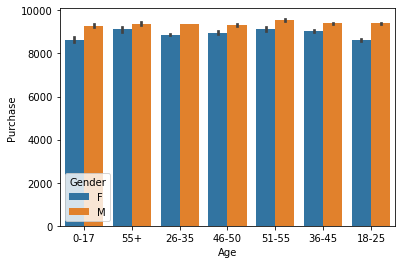

In [102]:
### visualizatin on age v/s purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

 #### By graph all age male people are purchase the maximum compare to  female

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

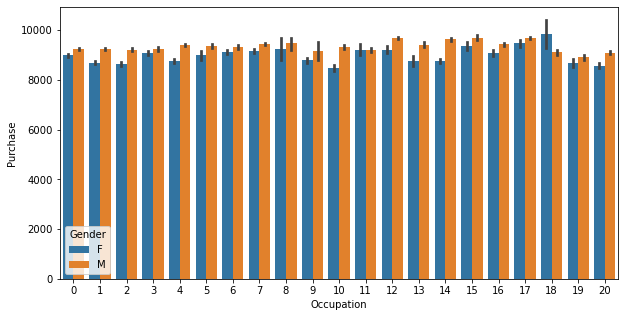

In [103]:
### visualizatin on occupation v/s purchase
plt.figure(figsize=(10,5))
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

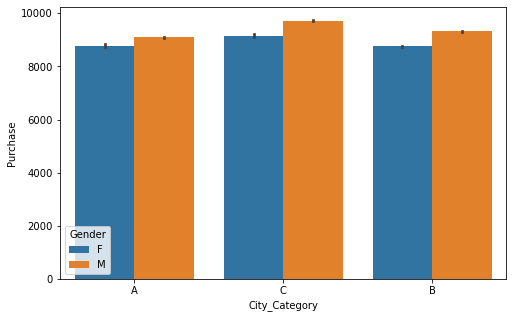

In [104]:
## visualize on city v/s purchase
plt.figure(figsize=(8,5))
#sns.countplot(x='City_Category',data=df)
sns.barplot('City_Category','Purchase',hue='Gender',data=df)
plt.show()

#### By this max of purchase are done by male people in the city c

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

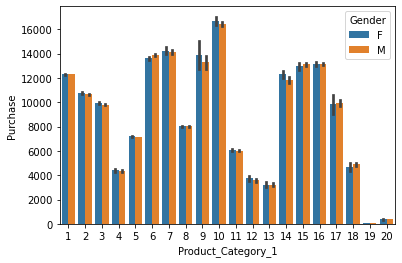

In [105]:
### visualizatin on product_category v/s purchase
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

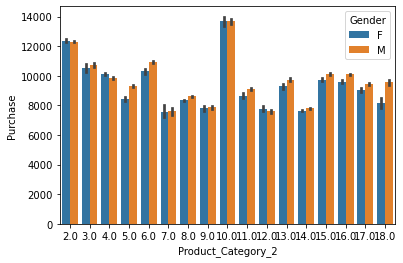

In [106]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

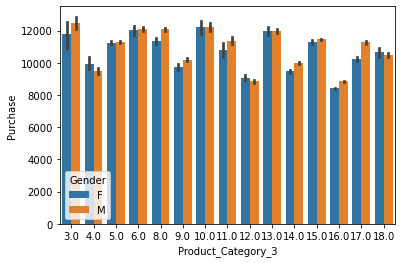

In [107]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [108]:
df.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.023563,-0.008441,0.001501,-0.001576,0.014461
Marital_Status,0.023563,1.000000,0.019579,0.012192,0.013808,-0.000951
Product_Category_1,-0.008441,0.019579,1.000000,0.286502,0.319209,-0.246187
Product_Category_2,0.001501,0.012192,0.286502,1.000000,0.463528,-0.090218
Product_Category_3,-0.001576,0.013808,0.319209,0.463528,1.000000,-0.131010
Purchase,0.014461,-0.000951,-0.246187,-0.090218,-0.131010,1.000000


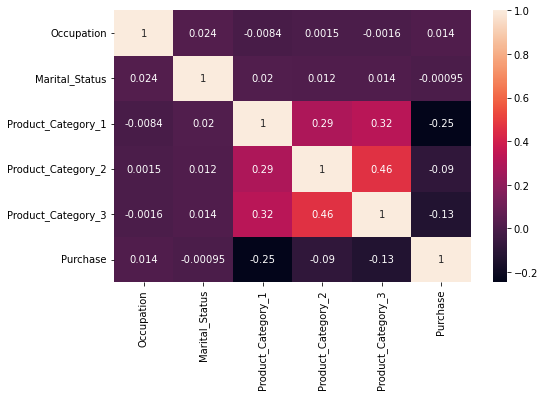

In [109]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Covert the categerical  varibale to numerical variable

In [81]:
## Fixing categerical Variable into Numerical Varialbe"Gender"
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,NaN,1,10,2,0,3,4.0,16.0,8370.0,0,0
1,1000001,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,NaN,1,10,2,0,12,4.0,16.0,1422.0,0,0
3,1000001,P00085442,NaN,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,NaN,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [82]:
## By using get_dummies
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
#df.head()

In [83]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [84]:
## Fixing Catergial Variable to Numerical Variable "Age"
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [85]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,NaN,NaN,10,2,0,3,4.0,16.0,8370.0,0,0
1,1000001,P00248942,NaN,NaN,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,NaN,NaN,10,2,0,12,4.0,16.0,1422.0,0,0
3,1000001,P00085442,NaN,NaN,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,NaN,NaN,16,4,0,8,8.0,16.0,7969.0,0,1


In [86]:
#second Technique
# Import label encoder
#from sklearn import preprocessing
 
#label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
#df['Age']= label_encoder.fit_transform(df['Age'])
 
#df['Age'].unique()

In [87]:
##Fixing the Caterigal variable into Numerical variable "City_Category"
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

KeyError: 'City_Category'

In [88]:
df=pd.concat([df,df_city],axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,B,C
0,1000001,P00069042,NaN,NaN,10,2,0,3,4.0,16.0,8370.0,0,0,0,0
1,1000001,P00248942,NaN,NaN,10,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,1000001,P00087842,NaN,NaN,10,2,0,12,4.0,16.0,1422.0,0,0,0,0
3,1000001,P00085442,NaN,NaN,10,2,0,12,14.0,16.0,1057.0,0,0,0,0
4,1000002,P00285442,NaN,NaN,16,4,0,8,8.0,16.0,7969.0,0,1,0,1


In [89]:
df.drop('City_Category',axis=1,inplace=True)
df.head()

KeyError: "['City_Category'] not found in axis"

In [35]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [36]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,4.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,4.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1
5,1000003,P00193542,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1000004,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1000004,P00346142,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1000004,P0097242,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1000005,P00274942,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [37]:
df.shape

(783667, 13)

In [38]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,4.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,4.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [42]:
##convert object into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [44]:
df['B']=df['B'].astype(int)

In [45]:
df['C']=df['C'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

## All data is Converted into numerical data and data type also corrected

# Now Data is cleaned and Build the model

In [47]:
df1=df.copy(deep=True)

In [48]:
df_test=df1[df['Purchase'].isnull()]
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,1000010,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,1000010,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [55]:
df_train=df1[~df1['Purchase'].isnull()]
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,4.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,4.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [57]:
X=df_train.drop(['Purchase','User_ID','Product_ID'],axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,4.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,4.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [58]:
y=df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [59]:
print('X_shape:',X.shape)
print('y_shape:',y.shape)

X_shape: (550068, 10)
y_shape: (550068,)


## Scale the data

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
X_sc=sc.fit_transform(X)
X_sc

array([[-1.74651251, -1.84424754,  0.29486356, ...,  0.36879231,
        -0.85142167, -0.67214331],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.36117636,
        -0.85142167, -0.67214331],
       [-1.74651251, -1.84424754,  0.29486356, ...,  0.36879231,
        -0.85142167, -0.67214331],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ...,  0.36879231,
         1.17450616, -0.67214331],
       [-1.74651251,  2.58827703, -1.08494277, ...,  0.36879231,
        -0.85142167,  1.48777797],
       [-1.74651251,  1.11076884, -1.23825458, ...,  0.36879231,
         1.17450616, -0.67214331]])

In [62]:
## Convert the data  from array into data frame
X_sc=pd.DataFrame(X_sc)
X_sc.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-0.610809,-1.160147,0.368792,-0.851422,-0.672143
1,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-1.118912,-0.751351,-0.361176,-0.851422,-0.672143
2,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,-1.160147,0.368792,-0.851422,-0.672143
3,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,0.883835,0.368792,-0.851422,-0.672143
4,0.572570,2.588277,1.214734,1.660861,-0.833018,0.659449,-0.342554,0.368792,-0.851422,1.487778


####  After scaling the data is give -ve values to over this -ve value we do MinMaxScaler

## MinMaxScaler

In [63]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()

In [64]:
X_mms=mms.fit_transform(X)
X_mms

array([[0.        , 0.        , 0.5       , ..., 0.86666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.73333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.86666667, 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.75      , ..., 0.86666667, 1.        ,
        0.        ],
       [0.        , 1.        , 0.05      , ..., 0.86666667, 0.        ,
        1.        ],
       [0.        , 0.66666667, 0.        , ..., 0.86666667, 1.        ,
        0.        ]])

In [65]:
X_mms=pd.DataFrame(X_mms)
X_mms.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.5,0.5,0.0,0.105263,0.125,0.866667,0.0,0.0
1,0.0,0.0,0.5,0.5,0.0,0.000000,0.250,0.733333,0.0,0.0
2,0.0,0.0,0.5,0.5,0.0,0.578947,0.125,0.866667,0.0,0.0
3,0.0,0.0,0.5,0.5,0.0,0.578947,0.750,0.866667,0.0,0.0
4,1.0,1.0,0.8,1.0,0.0,0.368421,0.375,0.866667,0.0,1.0


In [60]:
## Train the model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [67]:
X_mms_train,X_mms_test, y_train, y_test = train_test_split(X_mms, y, test_size=0.25,random_state =100)

In [68]:
print('X_train:',X_mms_train.shape)
print('X_test:',X_mms_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (412551, 10)
X_test: (137517, 10)
y_train: (412551,)
y_test: (137517,)


In [69]:
lr_model=lr.fit(X_mms_train,y_train)
lr_model

LinearRegression()

In [70]:
tr_pred=lr.predict(X_mms_train)
ts_pred=lr.predict(X_mms_test)

In [71]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train*100)
print('R_Squared_Test:',R_Squared_Test*100)

Mean_Squared_Error_Train: 21913934.42964686
Mean_Squared_Error_Test: 21937269.35303304
Root_Mean_Squared_Error_Train: 4681.232148659887
Root_Mean_Squared_Error_Test: 4683.723876685413
R_Squared_Train : 13.138045360779971
R_Squared_Test: 13.080958929453946


In [72]:
cols = ['Model', 'R-squared', 'RMSE']
result_tabulation = pd.DataFrame(columns = cols)
LinearRegression = pd.Series({'Model': "Linear Regression",
                 'R-squared' : R_Squared_Test,  'RMSE' :Root_Mean_Squared_Error_Test})
result_tabulation = result_tabulation.append(LinearRegression , ignore_index = True)
result_tabulation

,Model,R-squared,RMSE
0,Linear Regression,0.13081,4683.723877


In [173]:
pd.DataFrame(list(zip(y_train,tr_pred)),columns=['Actual','Predicted']).head()

,Actual,Predicted
0,8073.0,8768.771463
1,16409.0,11399.990586
2,3799.0,10268.465971
3,6350.0,7848.677187
4,4054.0,10602.278248


# VIF

In [174]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor as VIF

In [175]:
X=df.drop('Purchase',axis=1)
df_vif=pd.DataFrame()
df_vif['feature']=X.columns
df_vif['VIF']=[VIF(X.values,i) for i in range (len(X.columns))]

In [176]:
df_vif

,feature,VIF
0,Gender,3.862269
1,Age,7.891206
2,Occupation,2.561167
3,Stay_In_Current_City_Years,2.955615
4,Marital_Status,1.875780
5,Product_Category_1,3.344821
6,Product_Category_2,7.358715
7,Product_Category_3,18.660068
8,B,2.466673
9,C,2.126423


In [177]:
df.var()

Gender                        1.860366e-01
Age                           1.829895e+00
Occupation                    4.253917e+01
Stay_In_Current_City_Years    1.660981e+00
Marital_Status                2.418602e-01
Product_Category_1            1.504012e+01
Product_Category_2            1.850227e+01
Product_Category_3            7.511941e+00
Purchase                      2.523693e+07
B                             2.437220e-01
C                             2.142617e-01
dtype: float64

In [178]:
lst=[i for i in df.columns if df[i].var() < 0.5]
lst

['Gender', 'Marital_Status', 'B', 'C']

## By RidgeRegression

In [179]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rid=Ridge()

In [191]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state =100)

In [192]:
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

In [193]:
reg_regressor=GridSearchCV(rid,params,scoring='r2',cv=5)

In [197]:
reg_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='r2')

In [198]:
print(reg_regressor.best_params_)
print(reg_regressor.best_score_)

{'alpha': 20}
0.06715467406959448


In [200]:
rid=Ridge(alpha=20,  solver='auto',  random_state=100)
rid.fit(X_train,y_train)

Ridge(alpha=20, random_state=100)

In [201]:
ts_pred=rid.predict(X_test)
tr_pred=rid.predict(X_train)

In [202]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train)
print('R_Squared_Test:',R_Squared_Test)

Mean_Squared_Error_Train: 23570884.94599652
Mean_Squared_Error_Test: 23489263.28152881
Root_Mean_Squared_Error_Train: 4854.985576291295
Root_Mean_Squared_Error_Test: 4846.572322944207
R_Squared_Train : 0.0672069237775832
R_Squared_Test: 0.0656656830356791


In [203]:
cols = ['Model', 'R-squared', 'RMSE']
RidgeRegression = pd.Series({'Model': "Ridge Regression",
                 'R-squared' : R_Squared_Test,  'RMSE' :Root_Mean_Squared_Error_Test})
result_tabulation = result_tabulation.append(RidgeRegression , ignore_index = True)
result_tabulation

,Model,R-squared,RMSE
0,Linear Regression,0.065666,4846.572314
1,Ridge Regression,0.065666,4846.572314
2,RandomForestRegressor,0.240988,4368.254119
3,Ridge Regression,0.065666,4846.572323


## By Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [74]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state =100)

In [75]:
RFE=RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state=1)

In [76]:
RFE.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=1)

In [77]:
tr_pred=RFE.predict(X_train)
ts_pred=RFE.predict(X_test)

In [78]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train)
print('R_Squared_Test:',R_Squared_Test)

Mean_Squared_Error_Train: 5389132.047220247
Mean_Squared_Error_Test: 9299241.171813358
Root_Mean_Squared_Error_Train: 2321.450418858918
Root_Mean_Squared_Error_Test: 3049.465719074959
R_Squared_Train : 0.7863868102128133
R_Squared_Test: 0.6315488895494619


In [210]:
cols = ['Model', 'R-squared', 'RMSE']
RandomForestRegressor = pd.Series({'Model': "RandomForestRegressor",
                 'R-squared' : R_Squared_Test,  'RMSE' :Root_Mean_Squared_Error_Test})
result_tabulation = result_tabulation.append(RandomForestRegressor , ignore_index = True)
result_tabulation

,Model,R-squared,RMSE
0,Linear Regression,0.065666,4846.572314
1,Ridge Regression,0.065666,4846.572314
2,RandomForestRegressor,0.240988,4368.254119
3,Ridge Regression,0.065666,4846.572323
4,RandomForestRegressor,0.240988,4368.254119


## Cross Validation

In [212]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')
print(cross_val_score)

[0.06446929 0.06597925 0.06690942 0.06993796 0.06847743]


In [213]:
np.mean(cross_val_score)

0.06715467000170808